In [1]:
from fastai.conv_learner import *
from classifier import ClassifierTrainer

/home/sean/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
ldir = Path('/home/sean/hpc-home/')
hdir = ldir if ldir.exists() else Path('/home/n8307628')
PATH = hdir / 'skin_cancer/'
assert PATH.exists(), 'PATH invalid: {}'.format(PATH)

train_raw_half_ia_nervi = PATH / 'train_multi_raw_half_ia_nervi.csv'
train_all_half_ia_nervi = PATH / 'train_multi_half_ia_nervi.csv'
arch = resnet101
im_size = 256
bs = 64

train_csv = train_all_half_ia_nervi
test_csv = PATH / 'ISIC/test_all_17.csv'
test_path = PATH / 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
train_df = pd.read_csv(train_csv)
trlen = len(train_df)
val_idx = list(range(trlen - 150, trlen))

weight_name = 'resnet101_all_halfnervi'

trainer = ClassifierTrainer(PATH, arch, im_size, bs, train_csv, 
                            sn=weight_name, test_csv=test_csv, test_folder=test_path)
# trainer.lr_find()

Saving model as "resnet101_all_halfnervi"
Dataset has: ['keratosis', 'melanoma', 'nevus'] classes


training.


epoch      trn_loss   val_loss   accuracy                  
    0      0.695758   0.452151   0.807351  
    1      0.534436   0.443815   0.799747                  
    2      0.487303   0.464351   0.808619                  
    3      0.420629   0.44964    0.802281                  



epoch      trn_loss   val_loss   accuracy                  
    0      0.320959   0.409143   0.826362  
    1      0.315969   0.416016   0.831432                  
    2      0.288215   0.4089     0.830165                  

Saved weights as "resnet101_all_halfnervi_1"
Accuracy = 0.83                              
Confusion Matrix:
[[ 27   2  27]
 [  0 113  57]
 [  8  40 515]]
AUC for class 0, id keratosis = 0.96
AUC for class 1, id melanoma = 0.92
AUC for class 2, id nevus = 0.89
----------------------------------------
[[ 27   2  27]
 [  0 113  57]
 [  8  40 515]]


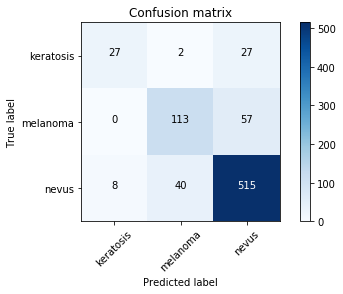

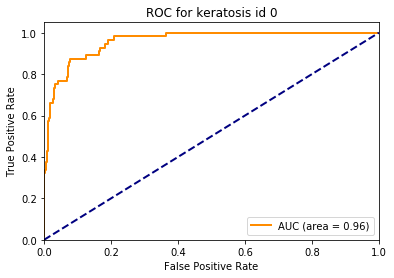

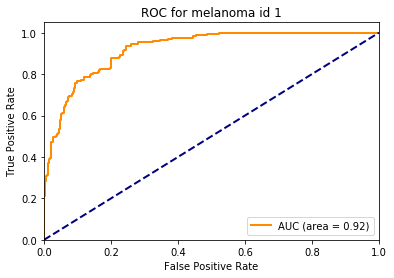

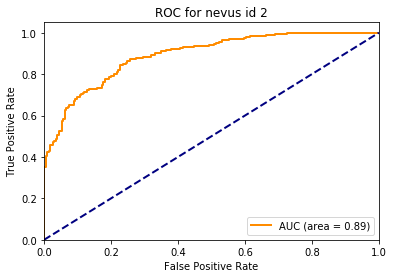

epoch      trn_loss   val_loss   accuracy                  
    0      0.432746   0.395848   0.82256   
    1      0.428723   0.403831   0.818758                  
    2      0.400455   0.376884   0.830165                  

Saved weights as "resnet101_all_halfnervi_2"
Loading ys from csv; shape (600,); vals [0 1 2]
Accuracy = 0.29
Confusion Matrix:
[[ 25  39  53]
 [ 74 110 209]
 [ 14  37  39]]
AUC for class 0, id keratosis = 0.50
AUC for class 1, id melanoma = 0.45
AUC for class 2, id nevus = 0.47
----------------------------------------
[[ 25  39  53]
 [ 74 110 209]
 [ 14  37  39]]


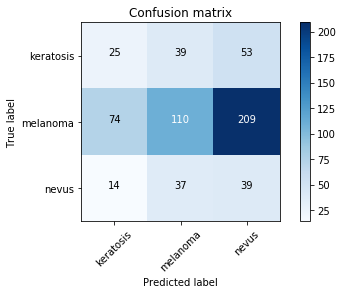

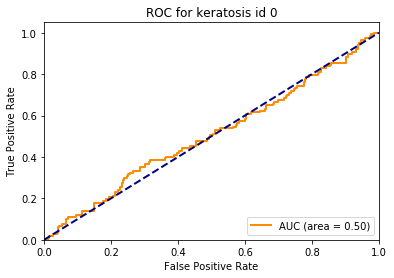

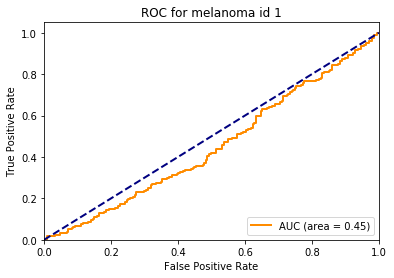

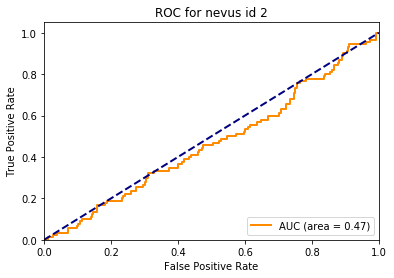

In [3]:
trainer.set_lr(2e-2)
print('training.')
trainer.init_fit(weight_name + '_1')
trainer.test_val()
trainer.inter_fit(weight_name + '_2')
trainer.test_eval()

In [5]:
trainer.learn.precompute = False
trainer.load(weight_name + '_2')

In [6]:
trainer.final_fit(weight_name + '_3')
trainer.test_val()

  0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
trainer.test_eval()

In [ ]:
del trainer

--------

# Second Train with no ia nervi

--------------

In [ ]:
ldir = Path('/home/sean/hpc-home/')
hdir = ldir if ldir.exists() else Path('/home/n8307628')
PATH = hdir / 'skin_cancer/'
assert PATH.exists(), 'PATH invalid: {}'.format(PATH)

arch = resnet101
im_size = 256
bs = 64

train_csv = PATH / 'train_multi_no_ia_nervi.csv'
test_csv = PATH / 'ISIC/test_all_17.csv'
test_path = PATH / 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
train_df = pd.read_csv(train_csv)
trlen = len(train_df)
val_idx = list(range(trlen - 150, trlen))

weight_name = 'resnet101_all_no_ia_nervi'

trainer2 = ClassifierTrainer(PATH, arch, im_size, bs, train_csv, 
                            sn=weight_name, test_csv=test_csv, test_folder=test_path)
trainer2.lr_find()

In [ ]:
trainer2.set_lr(1e-2)
print('training.')
trainer2.init_fit(weight_name + '_1')
trainer2.test_val()
trainer2.inter_fit(weight_name + '_2')
trainer2.test_eval()

In [ ]:
trainer2.final_fit(weight_name + '_3')
trainer2.test_val()

In [ ]:
trainer2.test_eval()